In [947]:
import matplotlib.pyplot as plt
import pandas as pd

#results = pd.read_csv(f"optimization_results/optimization_result_unfavourable0_2025-06-06_03-12.csv")

#New
#results = pd.read_csv(f"optimization_results/optimization_result_unfavourable0_2025-06-08_04-22.csv")
#results = pd.read_csv(f"optimization_results/optimization_result_favourable0_2025-06-08_01-15.csv")
#results = pd.read_csv(f"optimization_results/optimization_result_nfe100000_medium0_2025-06-06_16-34.csv")



In [948]:
# Weet niet of dit correct is qua totale kosten


In [949]:
setting = 2
if setting == 1:
    results = pd.read_csv(f"optimization_results/picked_optimization_result_unfavourable2_2025-06-08_07-29.csv")
    results['total costs'] = results['Expected Annual Damage'] + results['Dike Investment Costs'] + results['RfR Investment Costs'] + results['Evacuation Costs']
    threshold_evacuation = results['Evacuation Costs'].quantile(0.6)
    threshold_rfr = 10e7
    threshold_total_costs = results['total costs'].quantile(0.6)
    threshold_dike_costs = results['Dike Investment Costs'].quantile(0.6)
    threshold_deaths = 0.0267
    threshold_damage = results['Expected Annual Damage'].quantile(0.6)   
elif setting == 2:
    results = pd.read_csv(f"optimization_results/picked_optimization_result_favourable0_2025-06-08_01-15.csv")
    results['total costs'] = results['Expected Annual Damage'] + results['Dike Investment Costs'] + results['RfR Investment Costs'] + results['Evacuation Costs']
    threshold_evacuation = results['Evacuation Costs'].quantile(0.6)
    threshold_rfr = 10e7
    threshold_total_costs = results['total costs'].quantile(0.55)
    threshold_dike_costs = results['Dike Investment Costs'].quantile(0.6)
    threshold_deaths = 0.02
    threshold_damage = results['Expected Annual Damage'].quantile(0.6)
else:
    results = pd.read_csv(f"optimization_results/picked2_optimization_result_nfe100000_medium0_2025-06-06_16-34.csv")
    results['total costs'] = results['Expected Annual Damage'] + results['Dike Investment Costs'] + results['RfR Investment Costs'] + results['Evacuation Costs']
    threshold_evacuation = results['Evacuation Costs'].quantile(0.66)
    threshold_rfr = 10e7
    threshold_total_costs = results['total costs'].quantile(0.64)
    threshold_dike_costs = results['Dike Investment Costs'].quantile(0.7)
    threshold_deaths = 0.024
    threshold_damage = results['Expected Annual Damage'].quantile(0.5)





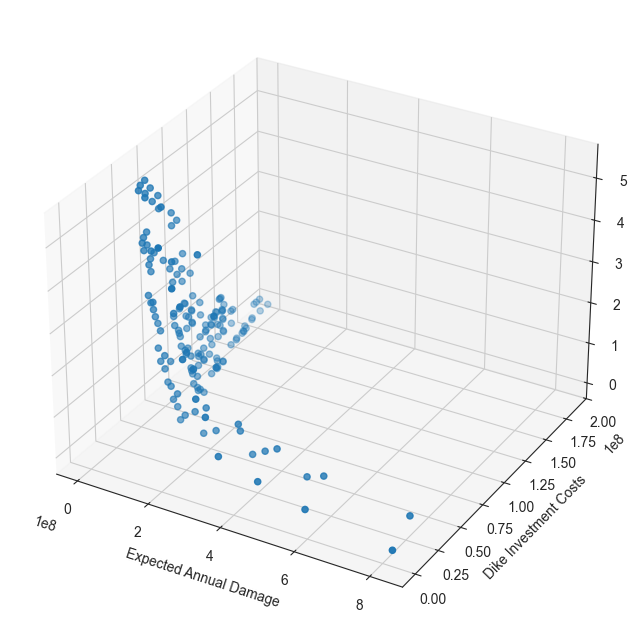

In [950]:
from mpl_toolkits.mplot3d import Axes3D  

metrics = results.iloc[:,-6:]

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(metrics['Expected Annual Damage'], metrics['Dike Investment Costs'], metrics['RfR Investment Costs'])
ax.set_xlabel('Expected Annual Damage')
ax.set_ylabel('Dike Investment Costs')
ax.set_zlabel('Evacuation Costs')
plt.show()

In [951]:
from ema_workbench.analysis import parcoords

limits = parcoords.get_limits(metrics)
#axes = parcoords.ParallelAxes(limits)
#axes.plot(metrics)

# we invert this axis so direction of desirability is the same 

#plt.show()


In [952]:
metrics.describe()

,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths,total costs
count,1.720000e+02,1.720000e+02,1.720000e+02,172.000000,172.000000,1.720000e+02
mean,7.958113e+07,8.471736e+07,1.537820e+08,115.060994,0.081136,3.180806e+08
std,1.385642e+08,4.316644e+07,1.547950e+08,403.902915,0.142213,1.610567e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.474999e+08
25%,5.243835e+06,4.784270e+07,3.070000e+07,0.000000,0.005219,2.020291e+08
50%,2.658643e+07,8.525040e+07,9.210000e+07,0.000000,0.027803,2.489157e+08
75%,6.898559e+07,1.145093e+08,2.365000e+08,0.000000,0.072998,4.238894e+08
max,8.252440e+08,1.866105e+08,5.403000e+08,3681.689294,0.841994,8.252440e+08


In [953]:
# Only policies with a rfr cost above 0

results = results[results['RfR Investment Costs'] > threshold_rfr]

In [954]:
results = results[results['total costs'] <= threshold_total_costs]

#results = results[results['total costs'] < 0.25e9] 

In [955]:
results = results[results['Dike Investment Costs'] <= threshold_dike_costs] 

In [956]:
results = results[results['Expected Number of Deaths'] <= threshold_deaths] 

In [957]:
results = results[results['Expected Annual Damage'] <= threshold_damage] 

In [958]:
results = results[results['Evacuation Costs'] <= threshold_evacuation] 

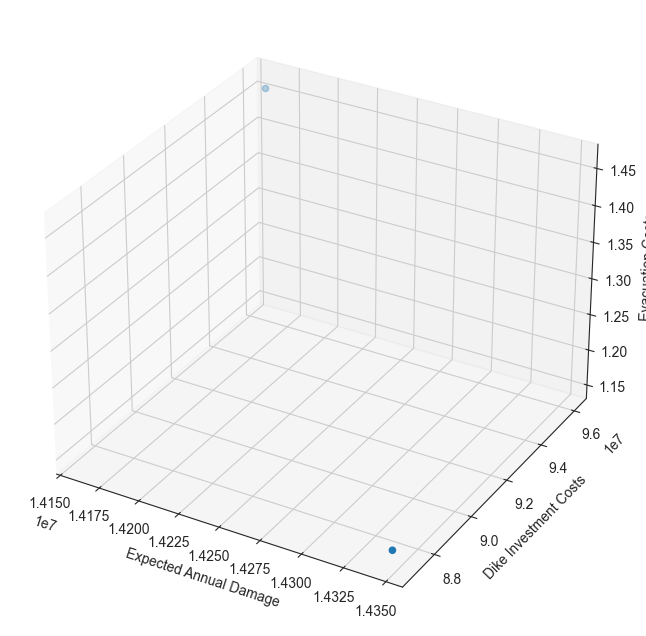

In [959]:
from mpl_toolkits.mplot3d import Axes3D  

metrics = results.iloc[:,-6:]

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(metrics['Expected Annual Damage'], metrics['Dike Investment Costs'], metrics['RfR Investment Costs'])
ax.set_xlabel('Expected Annual Damage')
ax.set_ylabel('Dike Investment Costs')
ax.set_zlabel('Evacuation Costs')
plt.show()

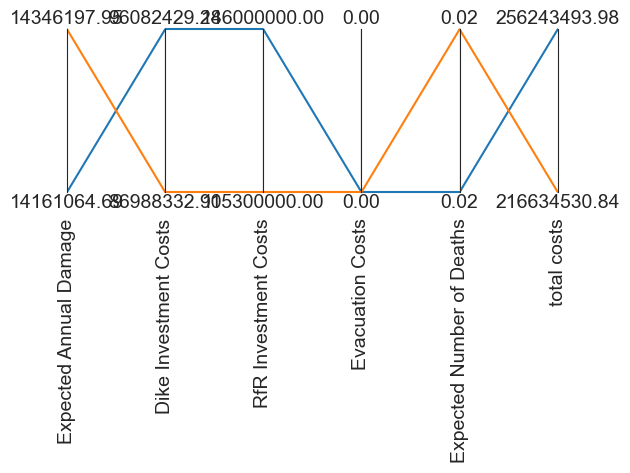

In [960]:
from ema_workbench.analysis import parcoords

limits = parcoords.get_limits(metrics)
axes = parcoords.ParallelAxes(limits)
axes.plot(metrics)

# we invert this axis so direction of desirability is the same 

plt.show()


In [961]:
results.head()

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,3_RfR 1,3_RfR 2,4_RfR 0,4_RfR 1,4_RfR 2,EWS_DaysToThreat,A.1_DikeIncrease 0,A.1_DikeIncrease 1,A.1_DikeIncrease 2,A.2_DikeIncrease 0,A.2_DikeIncrease 1,A.2_DikeIncrease 2,A.3_DikeIncrease 0,A.3_DikeIncrease 1,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths,total costs
71,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,1,0,0,3,0,0,1.416106e+07,9.608243e+07,146000000.0,0.0,0.016373,2.562435e+08
97,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,1.434620e+07,8.698833e+07,115300000.0,0.0,0.016795,2.166345e+08


In [962]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the DataFrame
results

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,3_RfR 1,3_RfR 2,4_RfR 0,4_RfR 1,4_RfR 2,EWS_DaysToThreat,A.1_DikeIncrease 0,A.1_DikeIncrease 1,A.1_DikeIncrease 2,A.2_DikeIncrease 0,A.2_DikeIncrease 1,A.2_DikeIncrease 2,A.3_DikeIncrease 0,A.3_DikeIncrease 1,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths,total costs
71,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,1,0,0,3,0,0,1.416106e+07,9.608243e+07,146000000.0,0.0,0.016373,2.562435e+08
97,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,1.434620e+07,8.698833e+07,115300000.0,0.0,0.016795,2.166345e+08


In [963]:
policy = results.iloc[:,:-6]

In [ ]:
Save = 0
if Save ==1:
    if setting ==1:
        policy.to_csv("policies/unfavourable_policy.csv", index=False)
    elif setting == 2:
        policy.to_csv("policies/favourable_policy.csv", index=False)
    else:
        policy.to_csv("policies/medium_policy.csv", index=False)

In [965]:
policy

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,3_RfR 1,3_RfR 2,4_RfR 0,4_RfR 1,4_RfR 2,EWS_DaysToThreat,A.1_DikeIncrease 0,A.1_DikeIncrease 1,A.1_DikeIncrease 2,A.2_DikeIncrease 0,A.2_DikeIncrease 1,A.2_DikeIncrease 2,A.3_DikeIncrease 0,A.3_DikeIncrease 1,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2
71,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,1,0,0,3,0,0
97,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0


In [966]:
for i in results.columns:
    print(i,'mean:',results[i].mean())
    #print(i,results[i].mean(),round(results[i].mean()))

0_RfR 0 mean: 0.5
0_RfR 1 mean: 0.0
0_RfR 2 mean: 0.5
1_RfR 0 mean: 0.0
1_RfR 1 mean: 0.0
1_RfR 2 mean: 0.0
2_RfR 0 mean: 1.0
2_RfR 1 mean: 0.0
2_RfR 2 mean: 0.5
3_RfR 0 mean: 0.0
3_RfR 1 mean: 0.0
3_RfR 2 mean: 0.0
4_RfR 0 mean: 0.0
4_RfR 1 mean: 0.0
4_RfR 2 mean: 0.0
EWS_DaysToThreat mean: 0.0
A.1_DikeIncrease 0 mean: 0.0
A.1_DikeIncrease 1 mean: 0.0
A.1_DikeIncrease 2 mean: 0.0
A.2_DikeIncrease 0 mean: 5.0
A.2_DikeIncrease 1 mean: 0.0
A.2_DikeIncrease 2 mean: 0.0
A.3_DikeIncrease 0 mean: 0.0
A.3_DikeIncrease 1 mean: 0.0
A.3_DikeIncrease 2 mean: 0.0
A.4_DikeIncrease 0 mean: 0.5
A.4_DikeIncrease 1 mean: 0.0
A.4_DikeIncrease 2 mean: 0.0
A.5_DikeIncrease 0 mean: 2.5
A.5_DikeIncrease 1 mean: 0.0
A.5_DikeIncrease 2 mean: 0.0
Expected Annual Damage mean: 14253631.31952382
Dike Investment Costs mean: 91535381.09059002
RfR Investment Costs mean: 130650000.0
Evacuation Costs mean: 0.0
Expected Number of Deaths mean: 0.01658392168413475
total costs mean: 236439012.41011384
